## Multi Label Classification of ECG and SHAP Analysis

In [1]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object with rotation range
datagen = ImageDataGenerator()

# Load and iterate training dataset with data augmentation
train_it = datagen.flow_from_directory('/home/achu/Desktop/XAI/data/train', 
                                       class_mode='categorical', 
                                       batch_size=500, 
                                       target_size=(256,256))

# Load and iterate validation dataset without data augmentation 
val_it = ImageDataGenerator().flow_from_directory('/home/achu/Desktop/XAI/data/val', 
                                                  class_mode='categorical', 
                                                  batch_size=64, 
                                                  target_size=(256,256))


2024-03-15 16:26:39.565806: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 16:26:39.565865: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 16:26:39.567230: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 16:26:39.574226: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 16:26:40.351467: W tensorflow/compiler/tf2

Found 2100 images belonging to 5 classes.
Found 420 images belonging to 5 classes.


In [10]:
import tensorflow as tf
from keras import layers, models
# Define the input shape
input_shape = (256, 256, 3)  # Assuming RGB images with three channels
# Create the model
model = models.Sequential()
# Add the first convolutional layer
model.add(layers.Conv2D(8, (4, 4), activation='relu', input_shape=input_shape))
# Add MaxPooling2D layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Add the second convolutional layer
model.add(layers.Conv2D(13, (2, 2), activation='relu'))
# Add MaxPooling2D layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Add the third convolutional layer
model.add(layers.Conv2D(13, (2, 2), activation='relu'))
# Add MaxPooling2D layer
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Flatten the output of the last convolutional layer
model.add(layers.Flatten())
# Add Dropout layer for regularization
model.add(layers.Dropout(0.5))  # You can adjust the dropout rate as needed
# Add a Dense layer with ReLU activation
model.add(layers.Dense(128, activation='relu'))
# Add a Dense layer with 5 outputs and softmax activation
model.add(layers.Dense(5, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 253, 253, 8)       392       
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 8)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 13)      429       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 13)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 13)        689       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 13)        0

Number of channels: 3


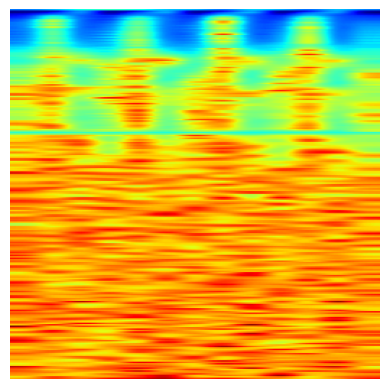

In [7]:
import cv2
image_path = '/home/achu/Desktop/XAI/data/train/APC/Spectrogram_207_1.png'
# Read the image
image = cv2.imread(image_path)
# Get the number of channels
num_channels = image.shape[2]
# Print the result
print("Number of channels:", num_channels)
import matplotlib.pyplot as plt
# Plot the image
plt.imshow(image)
plt.axis('off')  # Remove axis
plt.show()


In [23]:
history = model.fit(train_it, steps_per_epoch=len(train_it), epochs=100, validation_data=val_it, validation_steps=len(val_it))

Epoch 1/100


2024-03-15 03:06:16.319909: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.3073 - accuracy: 0.4200 - val_loss: 1.2601 - val_accuracy: 0.4548
Epoch 2/100


2024-03-15 03:06:22.350698: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.2478 - accuracy: 0.4324 - val_loss: 1.2350 - val_accuracy: 0.4405
Epoch 3/100


2024-03-15 03:06:28.167422: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.2073 - accuracy: 0.4462 - val_loss: 1.1899 - val_accuracy: 0.4548
Epoch 4/100


2024-03-15 03:06:33.896293: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.1676 - accuracy: 0.4743 - val_loss: 1.1703 - val_accuracy: 0.4833
Epoch 5/100


2024-03-15 03:06:39.449440: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.1443 - accuracy: 0.4638 - val_loss: 1.1442 - val_accuracy: 0.4905
Epoch 6/100


2024-03-15 03:06:45.053037: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.1028 - accuracy: 0.4852 - val_loss: 1.1116 - val_accuracy: 0.4976
Epoch 7/100


2024-03-15 03:06:50.823405: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 1.0718 - accuracy: 0.5038 - val_loss: 1.0895 - val_accuracy: 0.5071
Epoch 8/100
5/5 [==============================] - 6s 1s/step - loss: 1.0038 - accuracy: 0.5686 - val_loss: 0.9708 - val_accuracy: 0.6143
Epoch 9/100
5/5 [==============================] - 6s 1s/step - loss: 0.9196 - accuracy: 0.6243 - val_loss: 0.8659 - val_accuracy: 0.6762
Epoch 10/100


2024-03-15 03:07:08.092905: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.8248 - accuracy: 0.6610 - val_loss: 0.8032 - val_accuracy: 0.6810
Epoch 11/100


2024-03-15 03:07:13.809015: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.7422 - accuracy: 0.7119 - val_loss: 0.7323 - val_accuracy: 0.7190
Epoch 12/100


2024-03-15 03:07:19.676950: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.6821 - accuracy: 0.7257 - val_loss: 0.6492 - val_accuracy: 0.7405
Epoch 13/100


2024-03-15 03:07:25.602879: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.6248 - accuracy: 0.7600 - val_loss: 0.6216 - val_accuracy: 0.7976
Epoch 14/100


2024-03-15 03:07:31.416021: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.5802 - accuracy: 0.7890 - val_loss: 0.5714 - val_accuracy: 0.8071
Epoch 15/100


2024-03-15 03:07:37.180724: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.5432 - accuracy: 0.8071 - val_loss: 0.5444 - val_accuracy: 0.8167
Epoch 16/100


2024-03-15 03:07:42.931733: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.5030 - accuracy: 0.8162 - val_loss: 0.5204 - val_accuracy: 0.8190
Epoch 17/100


2024-03-15 03:07:48.592789: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.4673 - accuracy: 0.8357 - val_loss: 0.5031 - val_accuracy: 0.8143
Epoch 18/100


2024-03-15 03:07:54.269558: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.4370 - accuracy: 0.8543 - val_loss: 0.5037 - val_accuracy: 0.8381
Epoch 19/100


2024-03-15 03:07:59.984423: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.4278 - accuracy: 0.8538 - val_loss: 0.4574 - val_accuracy: 0.8548
Epoch 20/100


2024-03-15 03:08:05.650924: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.4014 - accuracy: 0.8610 - val_loss: 0.4356 - val_accuracy: 0.8476
Epoch 21/100


2024-03-15 03:08:11.179438: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.3850 - accuracy: 0.8748 - val_loss: 0.4291 - val_accuracy: 0.8619
Epoch 22/100


2024-03-15 03:08:16.852911: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.3623 - accuracy: 0.8662 - val_loss: 0.3994 - val_accuracy: 0.8786
Epoch 23/100


2024-03-15 03:08:22.536758: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.3114 - accuracy: 0.9033 - val_loss: 0.4006 - val_accuracy: 0.8786
Epoch 24/100


2024-03-15 03:08:28.078868: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.3184 - accuracy: 0.8910 - val_loss: 0.3851 - val_accuracy: 0.8738
Epoch 25/100


2024-03-15 03:08:33.754057: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.3044 - accuracy: 0.9090 - val_loss: 0.3736 - val_accuracy: 0.8738
Epoch 26/100
5/5 [==============================] - 6s 1s/step - loss: 0.2841 - accuracy: 0.9067 - val_loss: 0.3553 - val_accuracy: 0.8952
Epoch 27/100


2024-03-15 03:08:45.210786: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.2661 - accuracy: 0.9129 - val_loss: 0.3416 - val_accuracy: 0.8976
Epoch 28/100


2024-03-15 03:08:50.956103: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.2389 - accuracy: 0.9205 - val_loss: 0.3216 - val_accuracy: 0.8929
Epoch 29/100


2024-03-15 03:08:56.674476: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.2189 - accuracy: 0.9310 - val_loss: 0.3108 - val_accuracy: 0.9000
Epoch 30/100
5/5 [==============================] - 6s 1s/step - loss: 0.2065 - accuracy: 0.9386 - val_loss: 0.2960 - val_accuracy: 0.9095
Epoch 31/100


2024-03-15 03:09:08.056058: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1960 - accuracy: 0.9310 - val_loss: 0.2980 - val_accuracy: 0.9167
Epoch 32/100


2024-03-15 03:09:13.691539: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1997 - accuracy: 0.9319 - val_loss: 0.2890 - val_accuracy: 0.9024
Epoch 33/100


2024-03-15 03:09:19.416780: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1734 - accuracy: 0.9438 - val_loss: 0.2851 - val_accuracy: 0.9024
Epoch 34/100


2024-03-15 03:09:25.144307: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1726 - accuracy: 0.9471 - val_loss: 0.2740 - val_accuracy: 0.9190
Epoch 35/100


2024-03-15 03:09:30.709062: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1622 - accuracy: 0.9519 - val_loss: 0.2777 - val_accuracy: 0.9071
Epoch 36/100


2024-03-15 03:09:36.395779: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1646 - accuracy: 0.9490 - val_loss: 0.2770 - val_accuracy: 0.9095
Epoch 37/100


2024-03-15 03:09:42.228983: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1491 - accuracy: 0.9524 - val_loss: 0.2750 - val_accuracy: 0.9167
Epoch 38/100


2024-03-15 03:09:47.885986: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1330 - accuracy: 0.9652 - val_loss: 0.2790 - val_accuracy: 0.9167
Epoch 39/100


2024-03-15 03:09:53.562797: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1361 - accuracy: 0.9614 - val_loss: 0.2759 - val_accuracy: 0.9214
Epoch 40/100


2024-03-15 03:09:59.381997: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1261 - accuracy: 0.9629 - val_loss: 0.2738 - val_accuracy: 0.9190
Epoch 41/100


2024-03-15 03:10:05.166645: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1223 - accuracy: 0.9629 - val_loss: 0.2737 - val_accuracy: 0.9310
Epoch 42/100


2024-03-15 03:10:10.811543: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1166 - accuracy: 0.9686 - val_loss: 0.2683 - val_accuracy: 0.9190
Epoch 43/100


2024-03-15 03:10:16.433512: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1057 - accuracy: 0.9624 - val_loss: 0.2673 - val_accuracy: 0.9190
Epoch 44/100


2024-03-15 03:10:22.014678: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1052 - accuracy: 0.9676 - val_loss: 0.2700 - val_accuracy: 0.9190
Epoch 45/100


2024-03-15 03:10:27.615251: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 0.2619 - val_accuracy: 0.9167
Epoch 46/100


2024-03-15 03:10:33.430493: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.1075 - accuracy: 0.9676 - val_loss: 0.2676 - val_accuracy: 0.9262
Epoch 47/100


2024-03-15 03:10:39.267015: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0942 - accuracy: 0.9690 - val_loss: 0.2672 - val_accuracy: 0.9190
Epoch 48/100
5/5 [==============================] - 6s 1s/step - loss: 0.0925 - accuracy: 0.9767 - val_loss: 0.2669 - val_accuracy: 0.9238
Epoch 49/100


2024-03-15 03:10:50.580237: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0861 - accuracy: 0.9771 - val_loss: 0.2581 - val_accuracy: 0.9310
Epoch 50/100


2024-03-15 03:10:56.207629: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0926 - accuracy: 0.9700 - val_loss: 0.2712 - val_accuracy: 0.9310
Epoch 51/100


2024-03-15 03:11:01.812057: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0889 - accuracy: 0.9695 - val_loss: 0.2679 - val_accuracy: 0.9167
Epoch 52/100


2024-03-15 03:11:07.460335: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0845 - accuracy: 0.9752 - val_loss: 0.2629 - val_accuracy: 0.9286
Epoch 53/100


2024-03-15 03:11:13.135048: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 5s 1s/step - loss: 0.0758 - accuracy: 0.9819 - val_loss: 0.2689 - val_accuracy: 0.9238
Epoch 54/100
5/5 [==============================] - 6s 1s/step - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0.2698 - val_accuracy: 0.9310
Epoch 55/100


2024-03-15 03:11:24.211237: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0715 - accuracy: 0.9819 - val_loss: 0.2706 - val_accuracy: 0.9143
Epoch 56/100
5/5 [==============================] - 6s 1s/step - loss: 0.0714 - accuracy: 0.9810 - val_loss: 0.2732 - val_accuracy: 0.9214
Epoch 57/100


2024-03-15 03:11:35.489895: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0651 - accuracy: 0.9810 - val_loss: 0.2727 - val_accuracy: 0.9310
Epoch 58/100


2024-03-15 03:11:41.110163: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0631 - accuracy: 0.9829 - val_loss: 0.2682 - val_accuracy: 0.9262
Epoch 59/100


2024-03-15 03:11:46.736135: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 5s 1s/step - loss: 0.0674 - accuracy: 0.9786 - val_loss: 0.2679 - val_accuracy: 0.9333
Epoch 60/100


2024-03-15 03:11:52.245506: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0658 - accuracy: 0.9829 - val_loss: 0.2757 - val_accuracy: 0.9286
Epoch 61/100
5/5 [==============================] - 6s 1s/step - loss: 0.0625 - accuracy: 0.9795 - val_loss: 0.2686 - val_accuracy: 0.9310
Epoch 62/100


2024-03-15 03:12:03.572262: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0610 - accuracy: 0.9848 - val_loss: 0.2816 - val_accuracy: 0.9310
Epoch 63/100


2024-03-15 03:12:09.255763: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0570 - accuracy: 0.9833 - val_loss: 0.2767 - val_accuracy: 0.9238
Epoch 64/100


2024-03-15 03:12:14.811203: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.2724 - val_accuracy: 0.9238
Epoch 65/100
5/5 [==============================] - 6s 1s/step - loss: 0.0513 - accuracy: 0.9867 - val_loss: 0.2777 - val_accuracy: 0.9357
Epoch 66/100


2024-03-15 03:12:26.147513: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0489 - accuracy: 0.9876 - val_loss: 0.2723 - val_accuracy: 0.9333
Epoch 67/100


2024-03-15 03:12:31.725278: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0554 - accuracy: 0.9838 - val_loss: 0.2670 - val_accuracy: 0.9262
Epoch 68/100
5/5 [==============================] - 6s 1s/step - loss: 0.0541 - accuracy: 0.9867 - val_loss: 0.2812 - val_accuracy: 0.9238
Epoch 69/100


2024-03-15 03:12:43.134322: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0484 - accuracy: 0.9867 - val_loss: 0.2719 - val_accuracy: 0.9333
Epoch 70/100
5/5 [==============================] - 6s 1s/step - loss: 0.0628 - accuracy: 0.9771 - val_loss: 0.2811 - val_accuracy: 0.9405
Epoch 71/100


2024-03-15 03:12:54.450539: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.2772 - val_accuracy: 0.9190
Epoch 72/100


2024-03-15 03:13:00.192817: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0470 - accuracy: 0.9895 - val_loss: 0.2643 - val_accuracy: 0.9357
Epoch 73/100


2024-03-15 03:13:06.050111: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0413 - accuracy: 0.9886 - val_loss: 0.2673 - val_accuracy: 0.9357
Epoch 74/100


2024-03-15 03:13:11.787311: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.2711 - val_accuracy: 0.9381
Epoch 75/100


2024-03-15 03:13:17.316142: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0427 - accuracy: 0.9871 - val_loss: 0.2669 - val_accuracy: 0.9333
Epoch 76/100


2024-03-15 03:13:23.006743: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0404 - accuracy: 0.9900 - val_loss: 0.2807 - val_accuracy: 0.9310
Epoch 77/100


2024-03-15 03:13:28.898607: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0377 - accuracy: 0.9876 - val_loss: 0.2849 - val_accuracy: 0.9310
Epoch 78/100


2024-03-15 03:13:34.705403: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0389 - accuracy: 0.9890 - val_loss: 0.2873 - val_accuracy: 0.9333
Epoch 79/100


2024-03-15 03:13:40.467589: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 393226000 bytes after encountering the first element of size 393226000 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 [==============================] - 6s 1s/step - loss: 0.0340 - accuracy: 0.9881 - val_loss: 0.2674 - val_accuracy: 0.9333
Epoch 80/100
5/5 [==============================] - 6s 1s/step - loss: 0.0369 - accuracy: 0.9910 - val_loss: 0.2705 - val_accuracy: 0.9357
Epoch 81/100
5/5 [==============================] - 6s 1s/step - loss: 0.0338 - accuracy: 0.9919 - val_loss: 0.2872 - val_accuracy: 0.9214
Epoch 82/100
5/5 [==============================] - 6s 1s/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.2700 - val_accuracy: 0.9286
Epoch 83/100
5/5 [==============================] - 6s 1s/step - loss: 0.0304 - accuracy: 0.9910 - val_loss: 0.2665 - val_accuracy: 0.9310
Epoch 84/100
5/5 [==============================] - 6s 1s/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.2687 - val_accuracy: 0.9381
Epoch 85/100
5/5 [==============================] - 6s 1s/step - loss: 0.0392 - accuracy: 0.9890 - val_loss: 0.2636 - val_accuracy: 0.9333
Epoch 86/100
5/5 [======================

In [24]:
# Save the trained model
model.save('trained_model.h5')

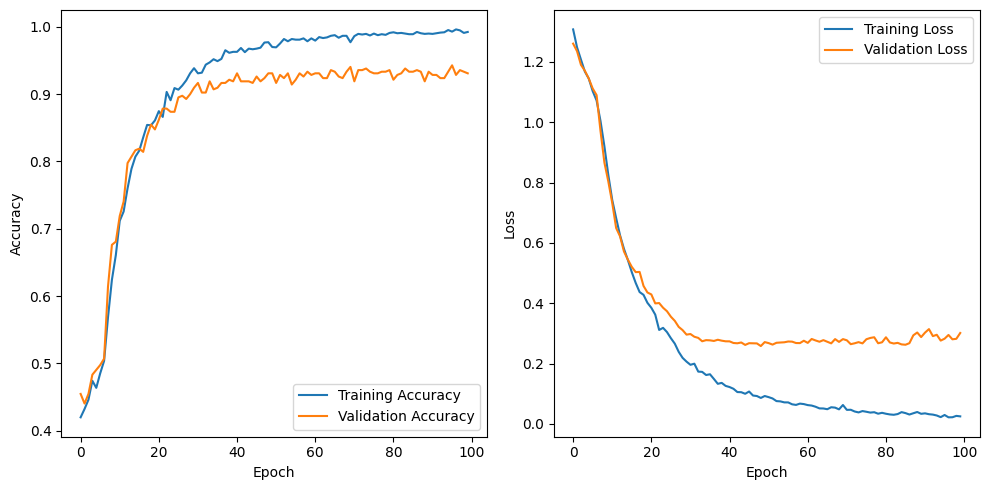

In [25]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [4]:
# Load and iterate training dataset with data augmentation
train_it = datagen.flow_from_directory('/home/achu/Desktop/XAI/data/train', 
                                       class_mode='categorical', 
                                       batch_size=32, 
                                       target_size=(256,256))
print(train_it)

Found 2100 images belonging to 5 classes.


In [5]:
import numpy as np
all_data = []
for batch in train_it:
    images, labels = batch
    all_data.append(images)
    if len(all_data) * 32 >= len(train_it.filenames):
        break  # Break when all files have been read

# Concatenate batches into a single array
X_train = np.concatenate(all_data)
# Print the shape of the data
print("Shape of X_train:", X_train.shape)

Shape of X_train: (2100, 256, 256, 3)


In [8]:
# Collect all labels
all_labels = []
for batch in train_it:
    images, labels = batch
    all_labels.append(labels)
    if len(all_labels) * 32 >= len(train_it.filenames):
        break  # Break when all files have been read

# Concatenate labels into a single array
y_train = np.concatenate(all_labels)
print("Shape of y_train:", y_train.shape)


Shape of y_train: (2100, 5)


In [ ]:
np.save('train_it.npy', {'X_train': X_train, 'y_train': y_train})

In [1]:
import numpy as np
# Load the train_it.npy file
data = np.load('train_it.npy', allow_pickle=True)

# Separate X_train and y_train
X_train = data.item()['X_train']
y_train = data.item()['y_train']


In [2]:
X_train = X_train.reshape(-1, 256, 256, 3)
# Normalize X_train
X_train = X_train / 255.0
y_train = np.array(y_train)

In [3]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.15, shuffle=True)

In [4]:
import tensorflow as tf
input_shape = X_train.shape[1:]
model = tf.keras.models.load_model('trained_model.h5')

2024-03-15 16:31:56.329080: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-15 16:31:56.329149: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-15 16:31:56.330540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-15 16:31:56.337411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 16:31:57.033956: W tensorflow/compiler/tf2

In [5]:
import cv2
import numpy as np
import shap
import matplotlib.pyplot as plt

def visualize_shap(model, x_tr, image_path, background_samples=100, target_size=(256, 256)):
    # Load and preprocess the image
    img = cv2.imread(image_path)
    img = cv2.resize(np.float32(img), target_size)
    img = img.reshape(-1, target_size[0], target_size[1], 3)
    img = img.astype(float)
    
    # Select background samples
    background = x_tr[np.random.choice(x_tr.shape[0], background_samples, replace=False)]
    
    # Initialize SHAP DeepExplainer
    e = shap.DeepExplainer(model, background)
    
    # Calculate the SHAP Values
    shap_values = e.shap_values(img)
    
    # Plot the SHAP Values
    shap.image_plot(shap_values, img, show=True)


/home/achu/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


/home/achu/.local/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
2024-03-15 16:31:17.378343: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-15 16:31:17.458220: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 16:31:18.005140: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
/home/achu/.local/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is de

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


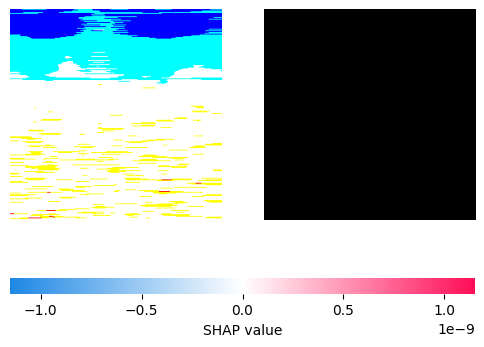

In [6]:
#Normal Patient
visualize_shap(model, x_tr, 'data/val/NOR/Spectrogram_100_9.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


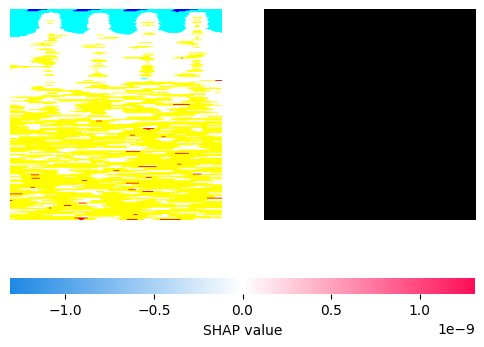

In [13]:
#APC Patient
visualize_shap(model, x_tr, 'data/val/APC/Spectrogram_207_2.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


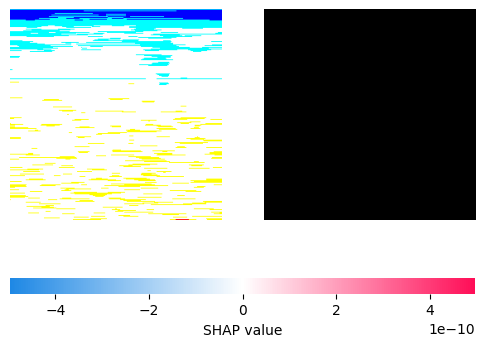

In [14]:
#LBB Patient
visualize_shap(model, x_tr, 'data/val/LBB/Spectrogram_109_35.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


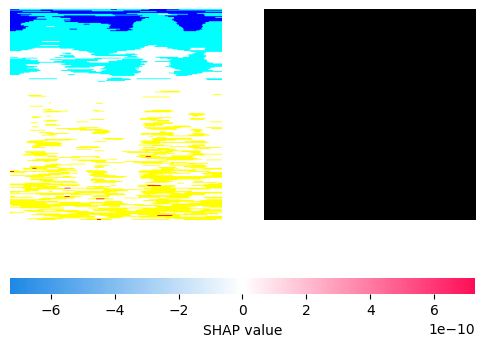

In [7]:
#PVC Patient
visualize_shap(model, x_tr, 'data/val/PVC/Spectrogram_106_50.png')

/home/achu/.local/lib/python3.10/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
2024-03-15 16:32:05.462486: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-15 16:32:05.543328: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-15 16:32:06.079472: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
/home/achu/.local/lib/python3.10/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is de

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


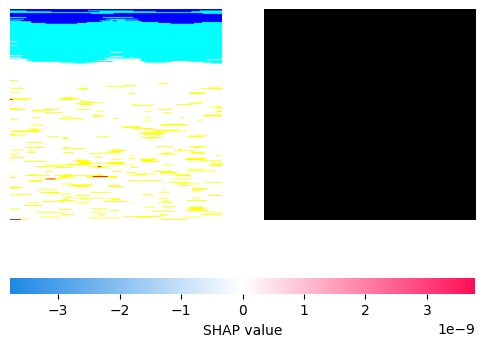

In [6]:
#RBB Patient
visualize_shap(model, x_tr, 'data/val/RBB/Spectrogram_118_123.png')